- Null Hypothesis (H₀): There is no significant relationship between the independent variables (credit_score, income, loan_amount, loan_term, interest_rate, debt_to_income_ratio, employment_years, savings_balance, and age) and the dependent variable (default_risk_score). In other words, these financial indicators do not significantly predict the likelihood of loan default
- Alternate Hypothesis (H₁): At least one of the independent variables has a significant relationship with the dependent variable (default_risk_score), meaning that financial indicators influence the likelihood of loan default.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pyforest
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
df = pd.read_csv('Train.csv')
df.head()

credit_score  income  loan_amount  loan_term  interest_rate  \
0           810  107410        11924         48           7.97   
1           418   37482        19291         24           6.94   
2           724   85641        39501         36           8.59   
3           444   73331        25714         36          13.09   
4           440   46723        35651         36           8.30   

   debt_to_income_ratio  employment_years  savings_balance  age  \
0                 43.29                32            27181   58   
1                 11.01                33            15089   43   
2                 37.11                 0            97459   33   
3                 33.39                18             2413   48   
4                 46.21                 6             9716   42   

   default_risk_score  
0         7634.543366  
1         6249.833059  
2         2148.117990  
3         4979.385344  
4         2993.851950

## Data prepocessing and visualization

In [6]:
# checking information for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   credit_score          800 non-null    int64  
 1   income                800 non-null    int64  
 2   loan_amount           800 non-null    int64  
 3   loan_term             800 non-null    int64  
 4   interest_rate         800 non-null    float64
 5   debt_to_income_ratio  800 non-null    float64
 6   employment_years      800 non-null    int64  
 7   savings_balance       800 non-null    int64  
 8   age                   800 non-null    int64  
 9   default_risk_score    800 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 62.6 KB


In [8]:
# getting the data description
df.describe()

credit_score         income   loan_amount   loan_term  interest_rate  \
count    800.000000     800.000000    800.000000  800.000000     800.000000   
mean     565.405000   85779.287500  27795.651250   36.315000       8.732238   
std      159.528109   37972.705711  12819.525021   17.163012       3.670453   
min      300.000000   20060.000000   5097.000000   12.000000       2.510000   
25%      426.750000   53056.250000  16136.000000   24.000000       5.537500   
50%      553.000000   85105.000000  28518.500000   36.000000       8.725000   
75%      702.000000  118776.000000  38539.750000   48.000000      11.915000   
max      849.000000  149972.000000  49976.000000   60.000000      14.990000   

       debt_to_income_ratio  employment_years  savings_balance         age  \
count            800.000000        800.000000       800.000000  800.000000   
mean              29.812500         16.376250     48850.921250   42.443750   
std               11.626346         10.036339     29785.455545   15.011446   
min               10.000000          0.000000        28.000000   18.000000   
25%               19.925000          8.000000     21359.750000   29.000000   
50%               29.645000         16.000000     47314.500000   42.000000   
75%               40.005000         25.000000     76191.000000   55.250000   
max               49.910000         34.000000     99976.000000   69.000000   

       default_risk_score  
count          800.000000  
mean          4529.968687  
std           2567.048232  
min             49.757940  
25%           2377.592064  
50%           4379.666025  
75%           6821.026905  
max           9113.843128

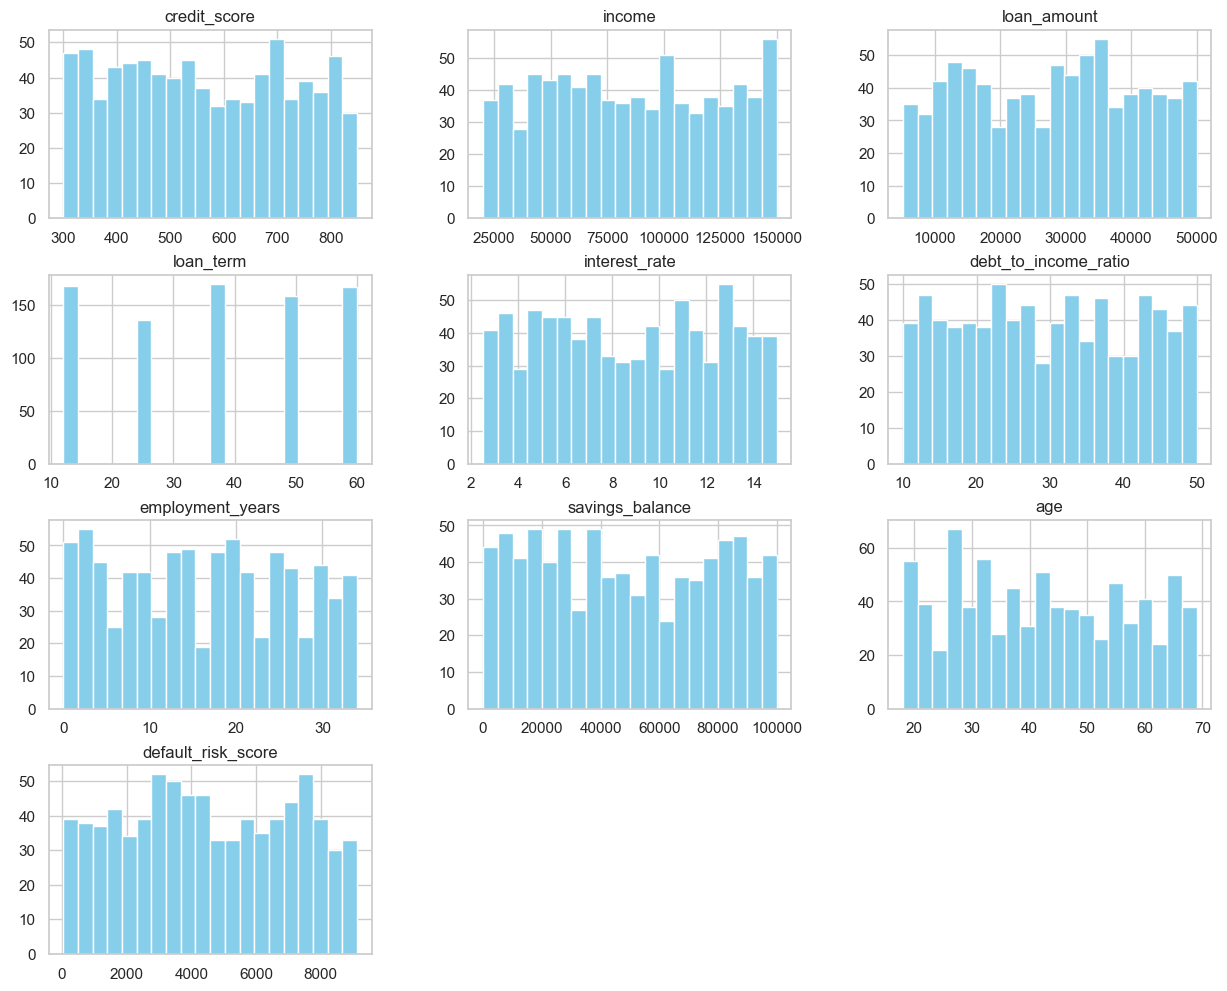

In [12]:
sns.set(style = 'whitegrid')
df.hist(bins = 20, figsize = (15, 12), color = 'skyblue');

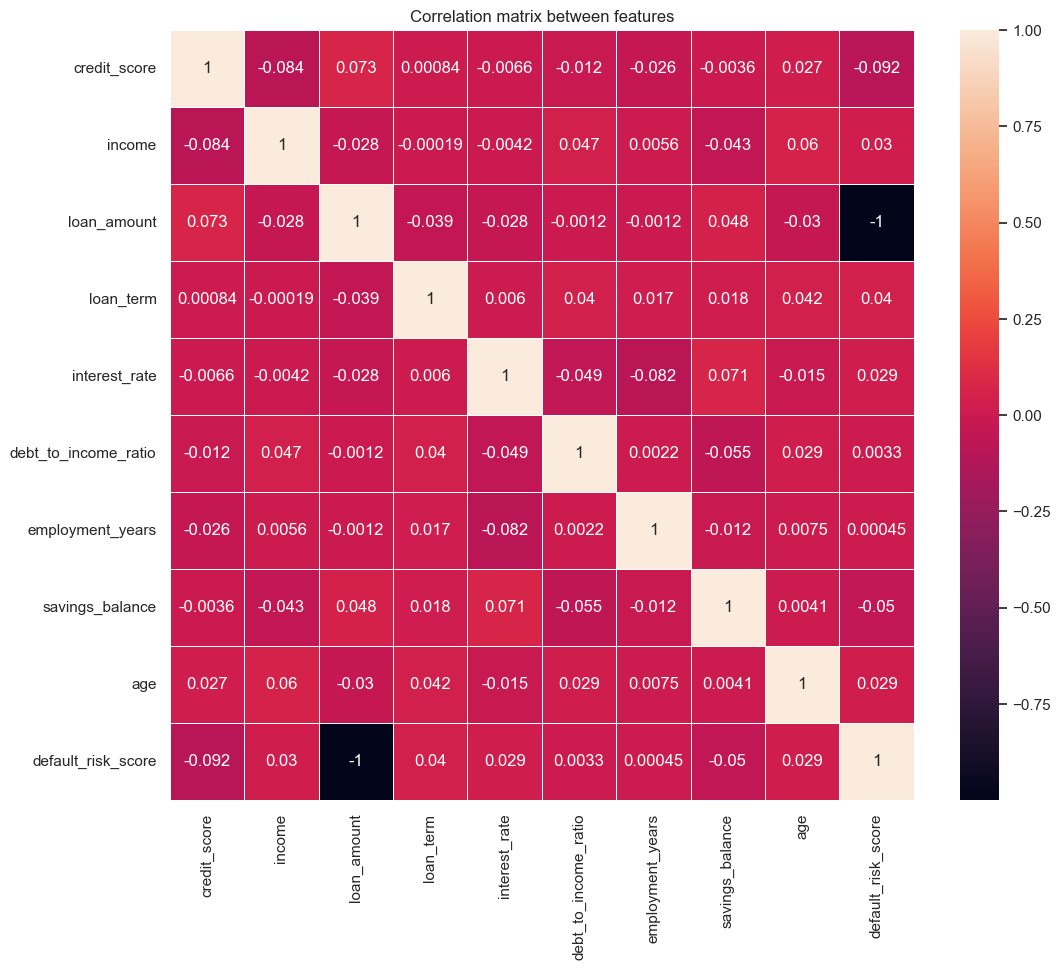

In [12]:
# Correlation matrix between features
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Adjust width and height
sns.heatmap(corr_matrix, annot=True, linewidth=.5)
plt.title("Correlation matrix between features")
plt.show()

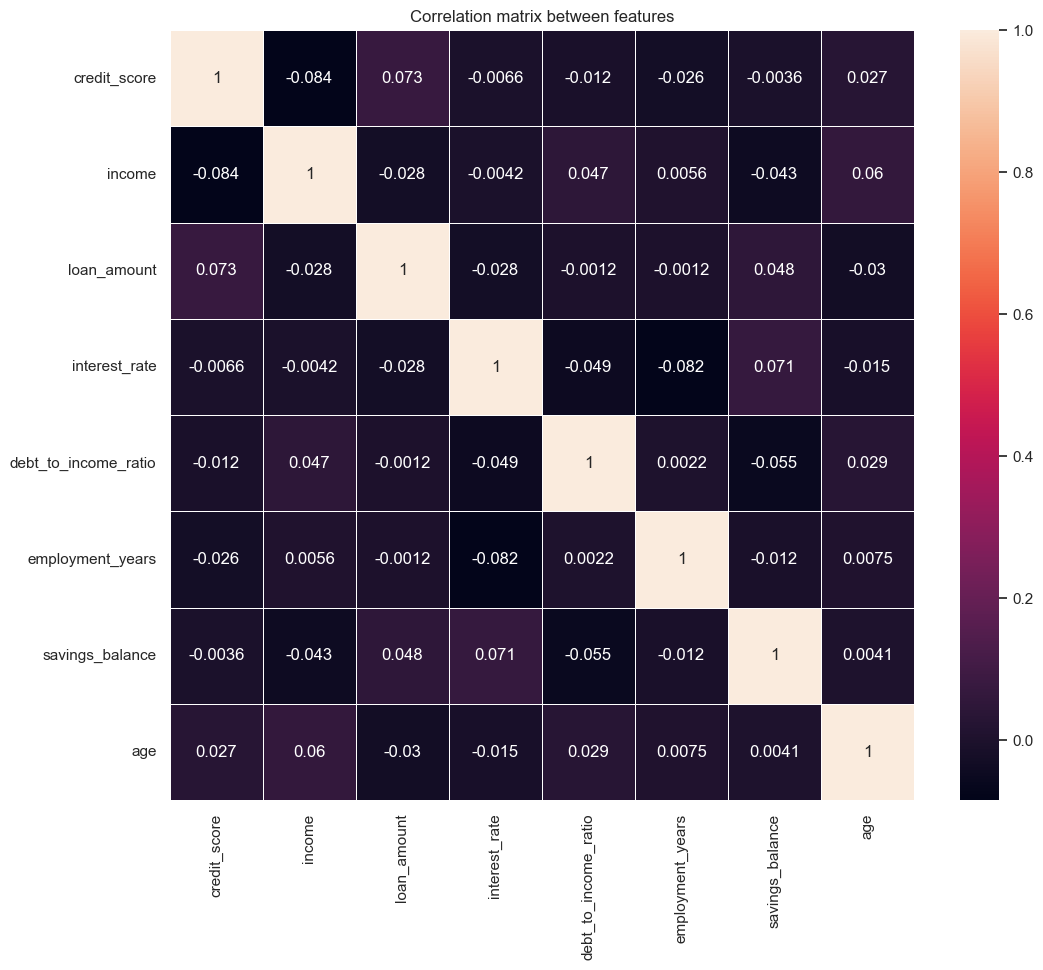

In [14]:
# Correlation matrix between features
col_variables = ["credit_score", "income", "loan_amount", "interest_rate", "debt_to_income_ratio", "employment_years", "savings_balance", "age"]

x = df[col_variables]
corr_matrix = x.corr()

plt.figure(figsize=(12, 10))  # Adjust width and height
sns.heatmap(data=corr_matrix, annot=True, linewidth=.5)
plt.title("Correlation matrix between features")
plt.show()

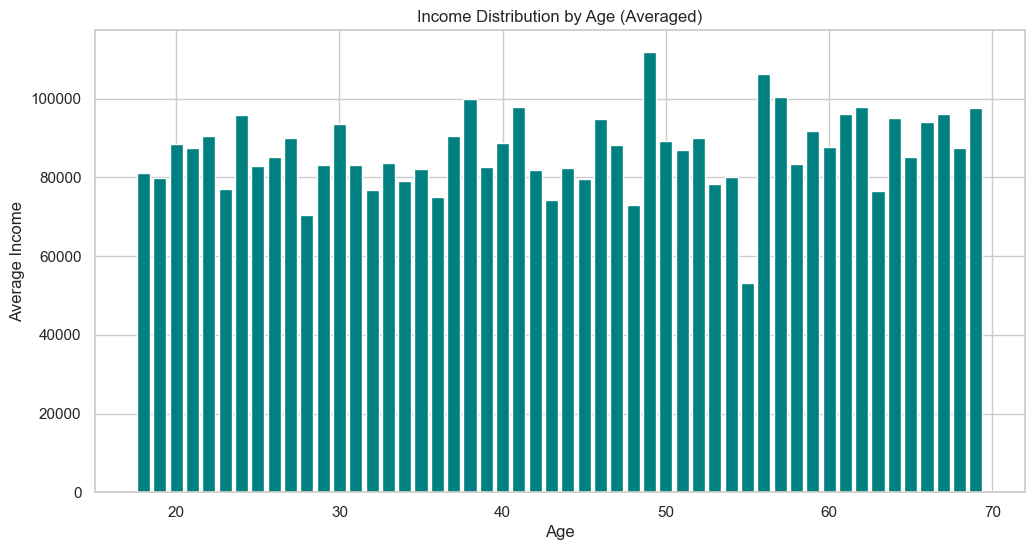

In [15]:
# distribution of income according to age
# Aggregate income by age (use mean or sum)
age_income = df.groupby('age')['income'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_income.index, age_income.values, color='teal', width=0.8)  # Increase width
plt.xlabel("Age")
plt.ylabel("Average Income")
plt.title("Income Distribution by Age (Averaged)")
plt.show()

#### Conclusion
- From the visualization above it shows that:
  1. People between the age of 49 are the highest earners followed by people between the age of 58-59.
  2. The lowest earners are people between the age of 55.
- Though the data is uniformly distributed, a conclusion can't be made fully in regards to it  

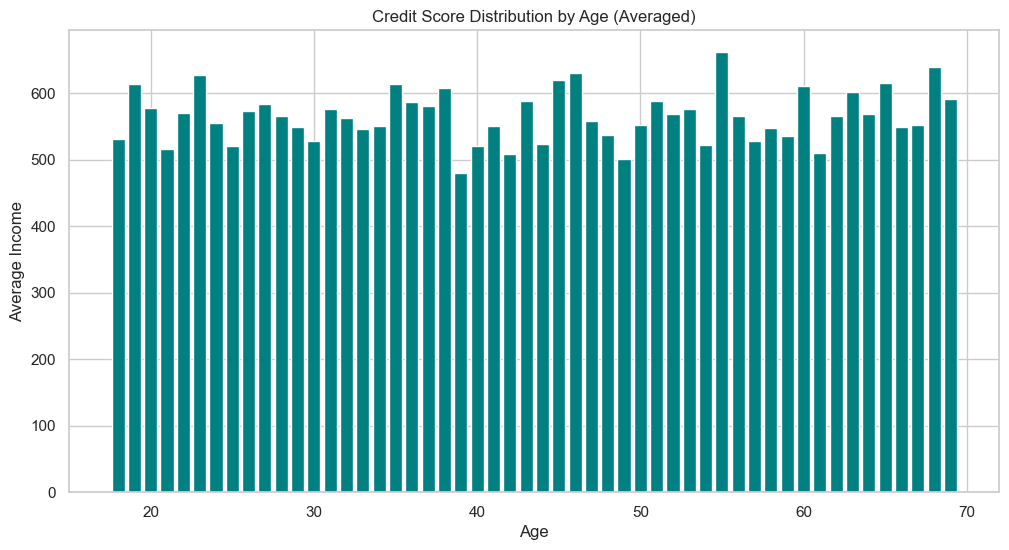

In [17]:
# distribution of credit-score according to age
# Aggregate income by age (use mean or sum)
age_credit_score = df.groupby('age')['credit_score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_credit_score.index, age_credit_score.values, color='teal', width=0.8)  # Increase width
plt.xlabel("Age")
plt.ylabel("Average Income")
plt.title("Credit Score Distribution by Age (Averaged)")
plt.show()

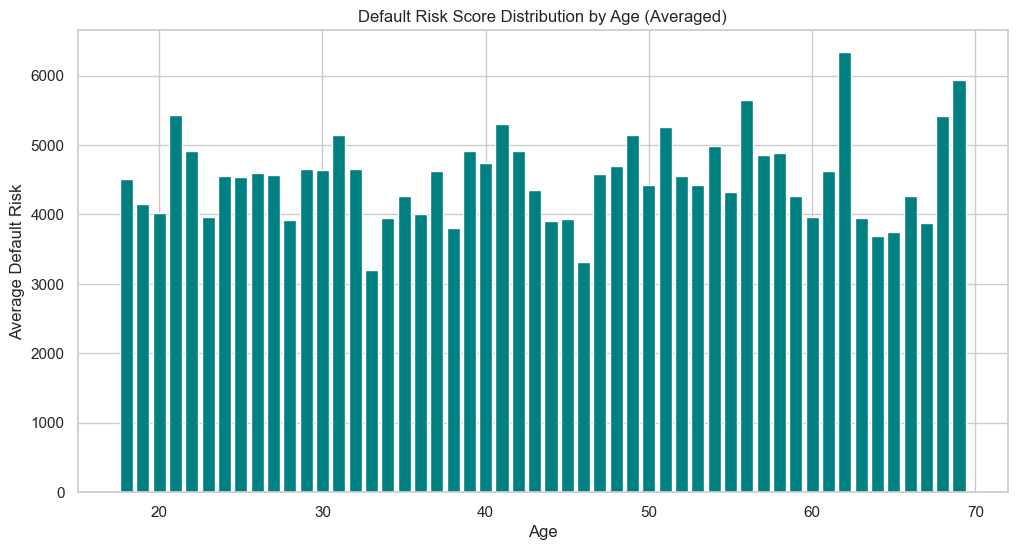

In [19]:
# Distribution of which age has a higher default risk
# Aggregate default_risk by age (use mean or sum)
age_default_risk = df.groupby('age')['default_risk_score'].mean()

plt.figure(figsize=(12, 6))
plt.bar(age_default_risk.index, age_default_risk.values, color='teal', width=0.8)  # Increase width
plt.xlabel("Age")
plt.ylabel("Average Default Risk")
plt.title("Default Risk Score Distribution by Age (Averaged)")
plt.show()

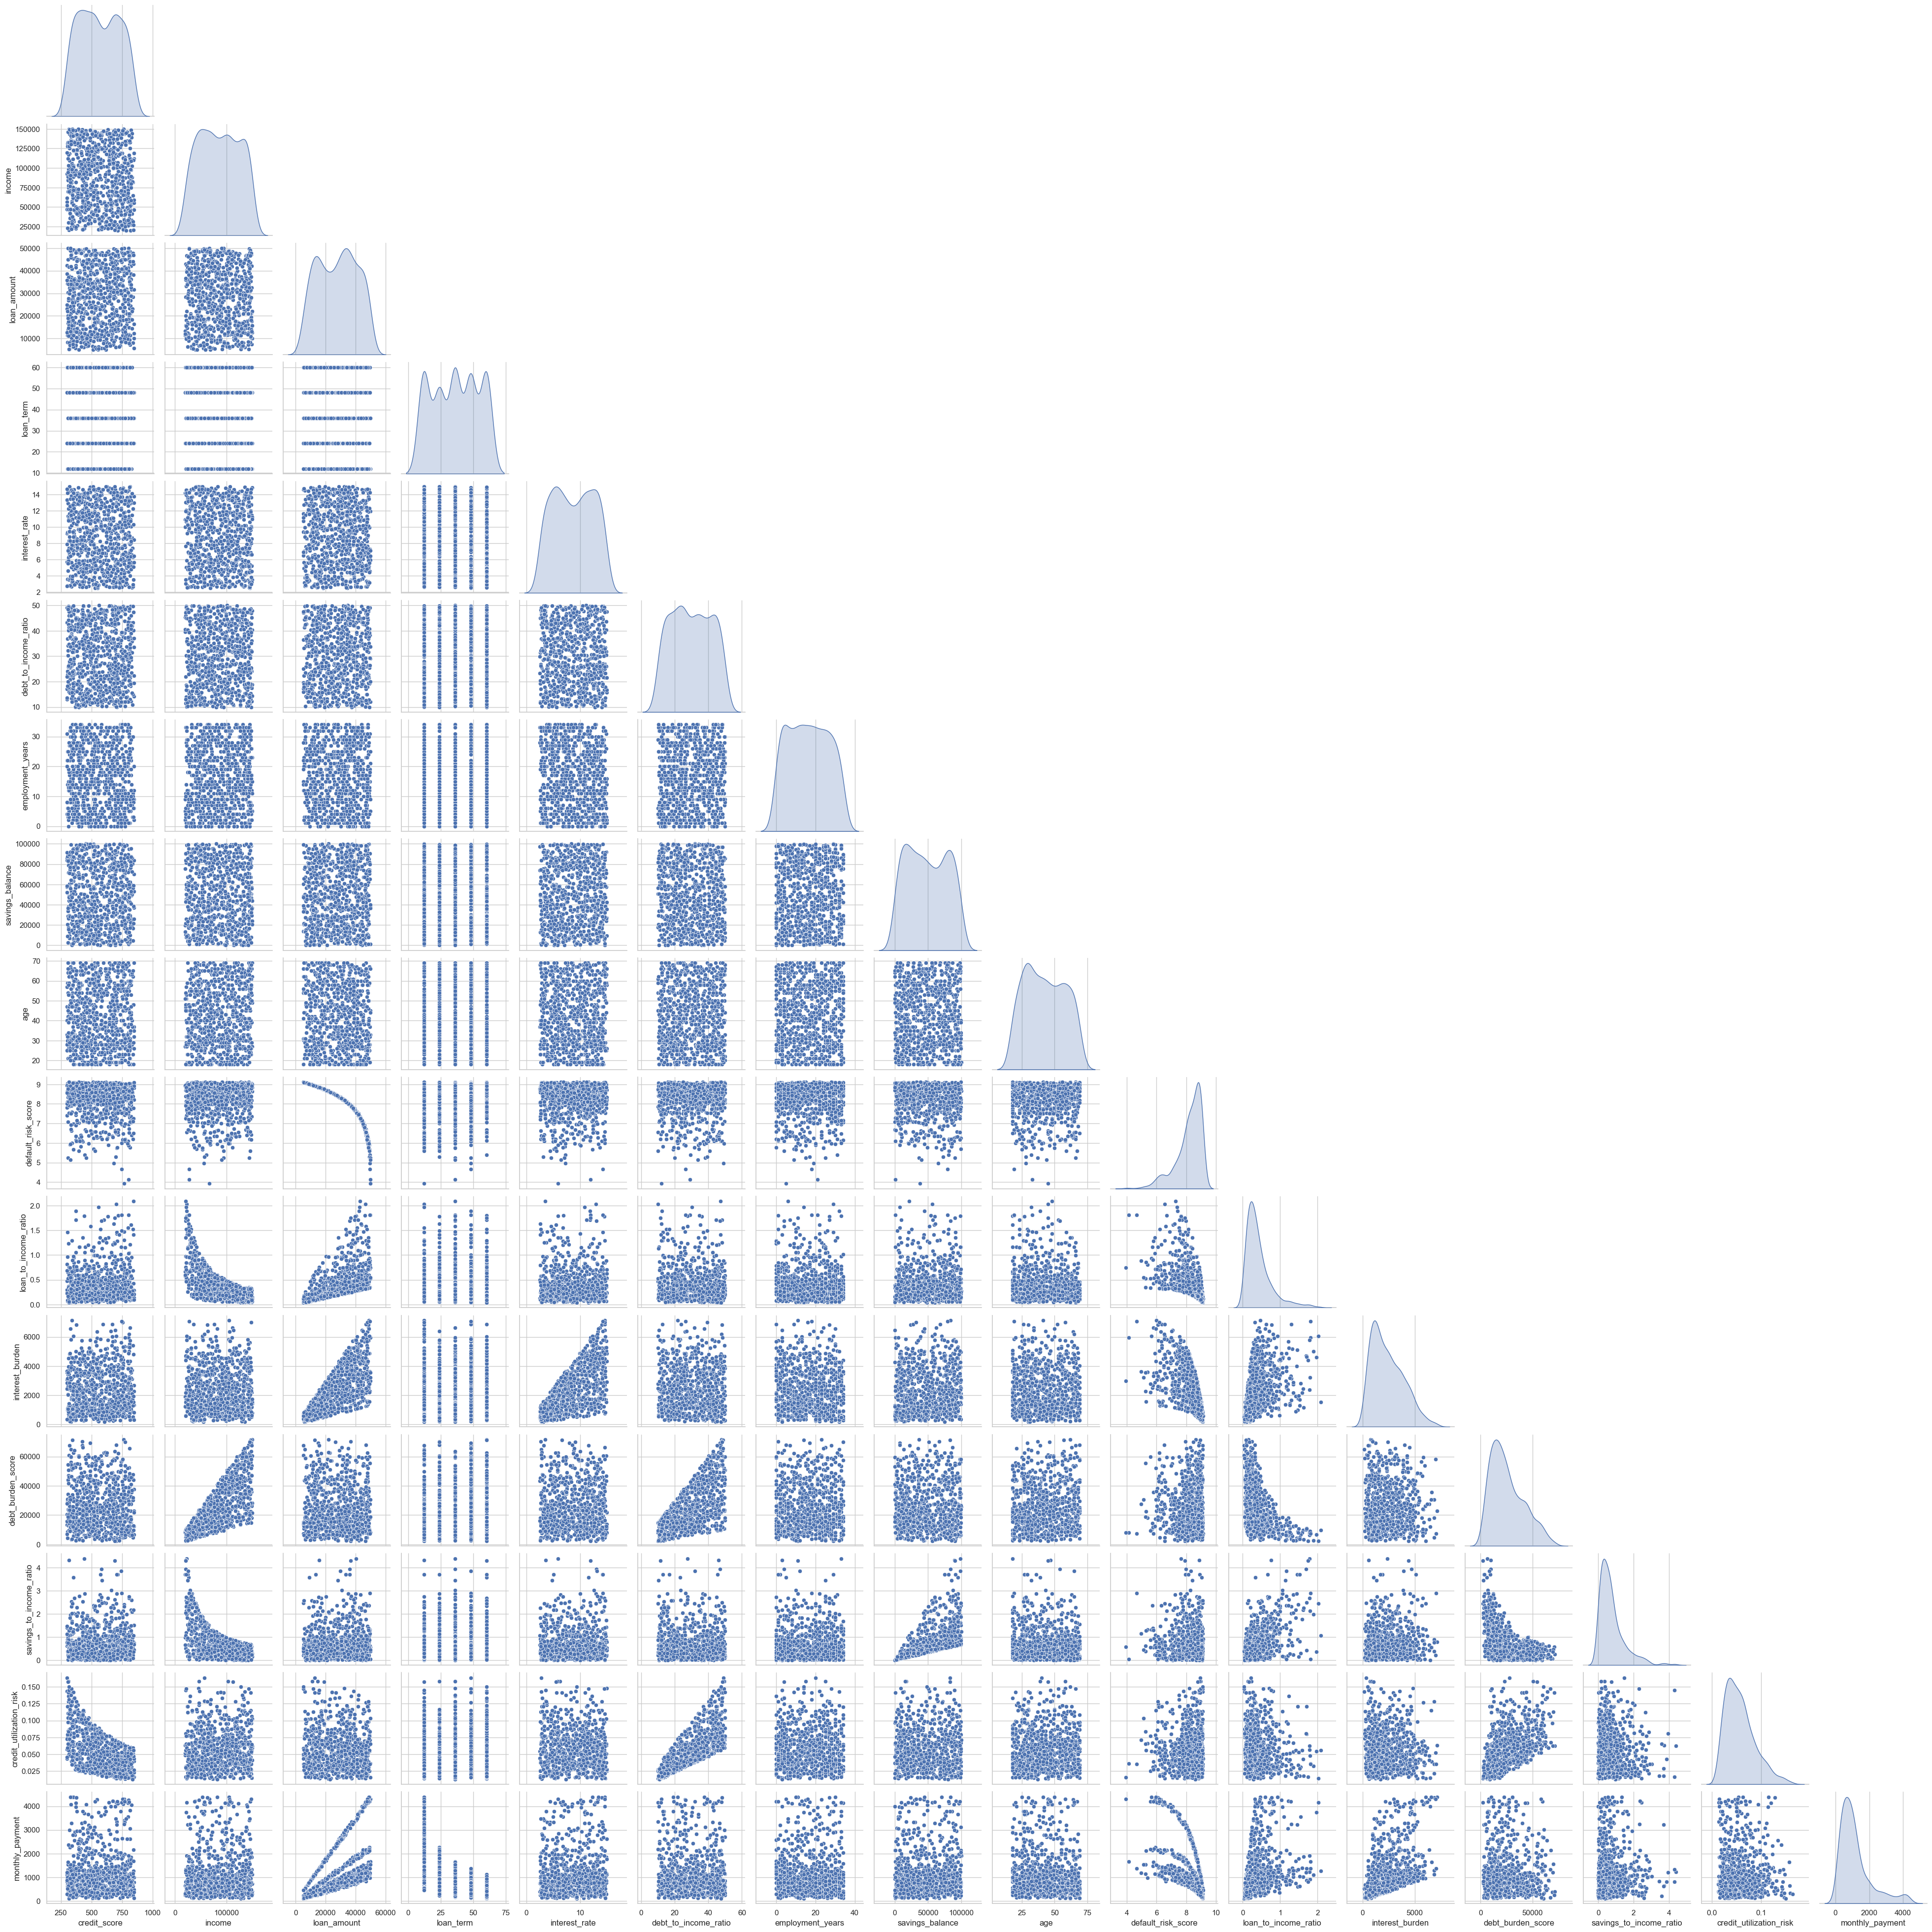

In [35]:
# Pairplot with hue for target variable
sns.pairplot(df, diag_kind='kde', corner=True)  # `corner=True` removes duplicate plots

# Show the plot
plt.show()

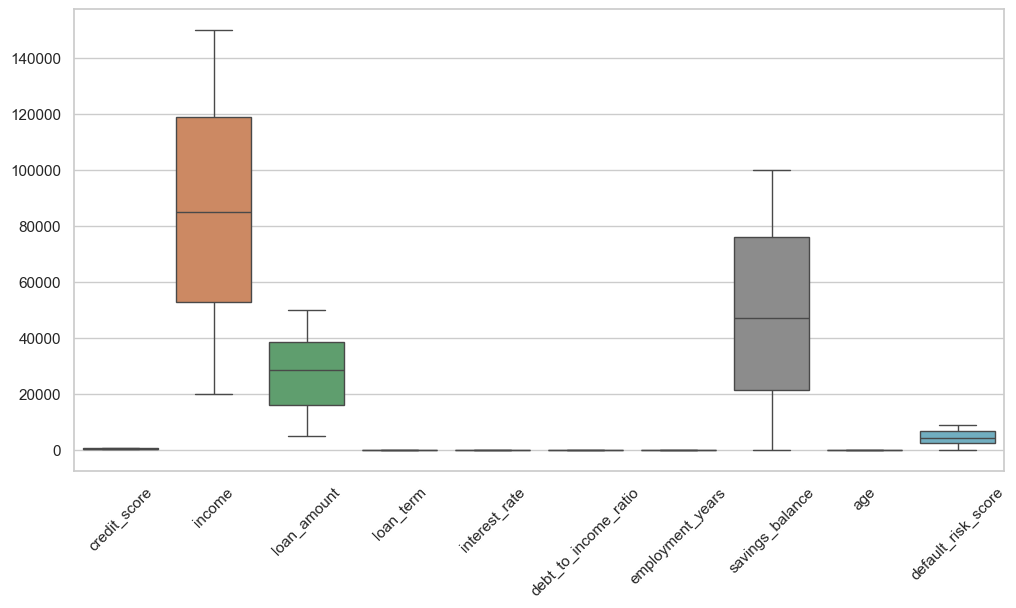

In [21]:
# Box plots for checking outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Key Observations
1. The data is uniformly distributed and skewed to the right.
2. There's a correlation between the loan_amount and the default_risk_score.
3. Most people with high income range between the age of 49yrs
4. From the BoxPlots it shows that the data does contain outliers in the income and savings balance columns

## Data Standadization
### 1. Feature Scaling

In [16]:
df['default_risk_score']= np.log(df['default_risk_score'] + 1)

In [18]:
X= df.drop(columns=["default_risk_score"])
y = df["default_risk_score"]

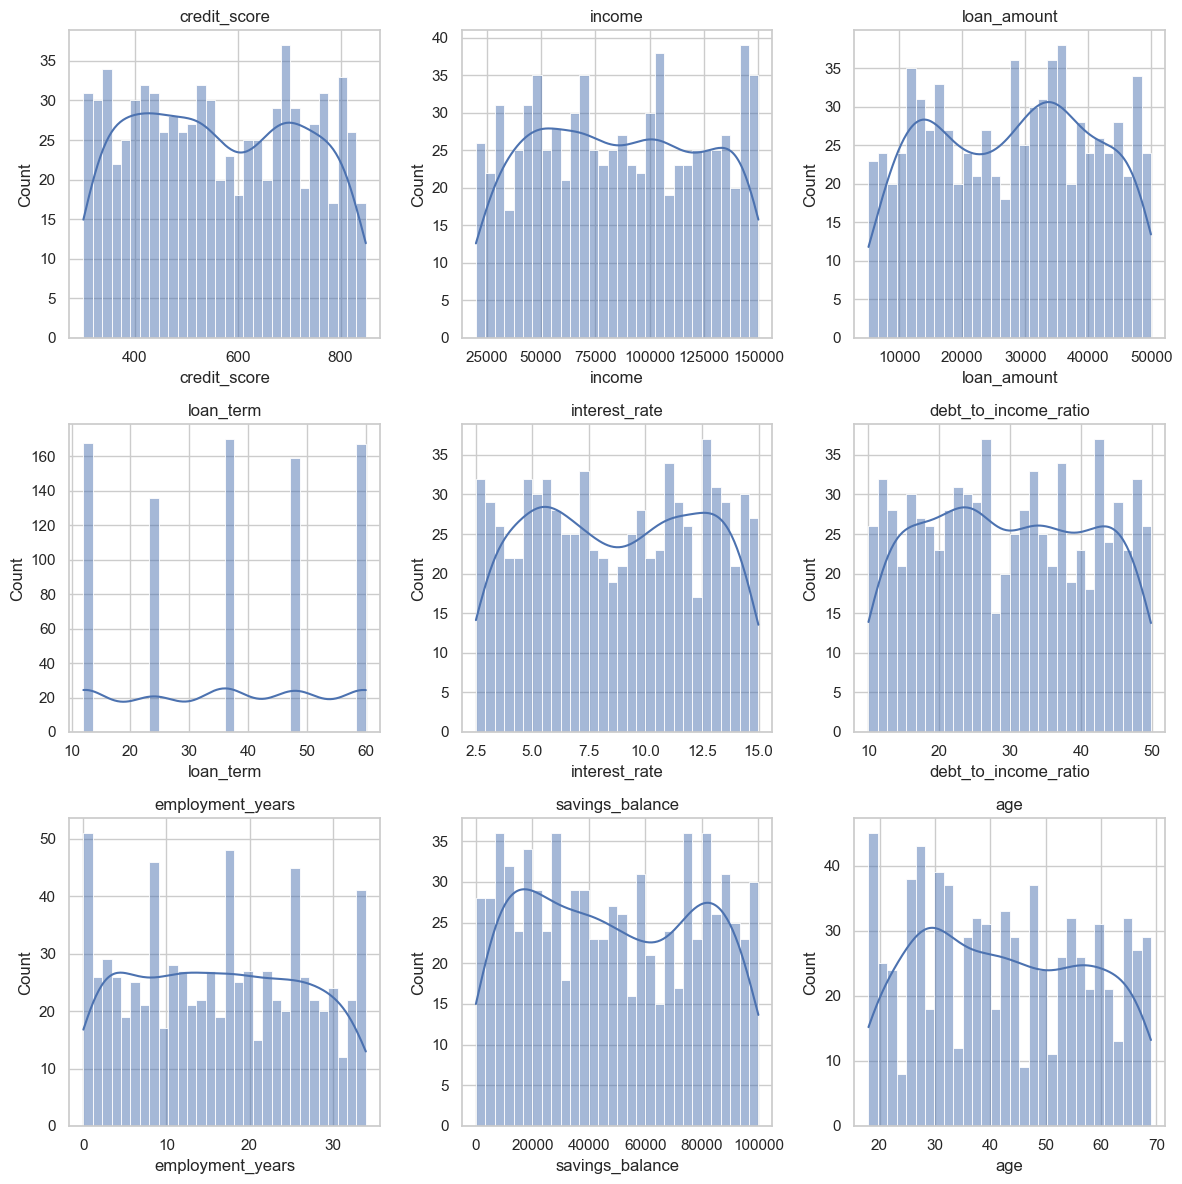

In [21]:
# Select only numerical columns
numerical_cols = X.columns

# Calculate number of rows and columns
num_features = len(numerical_cols)
rows = int(np.ceil(num_features / 3))  # Adjust rows dynamically

# Set up the subplot grid
plt.figure(figsize=(12, 4 * rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, 3, i)  # Adjust rows dynamically
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

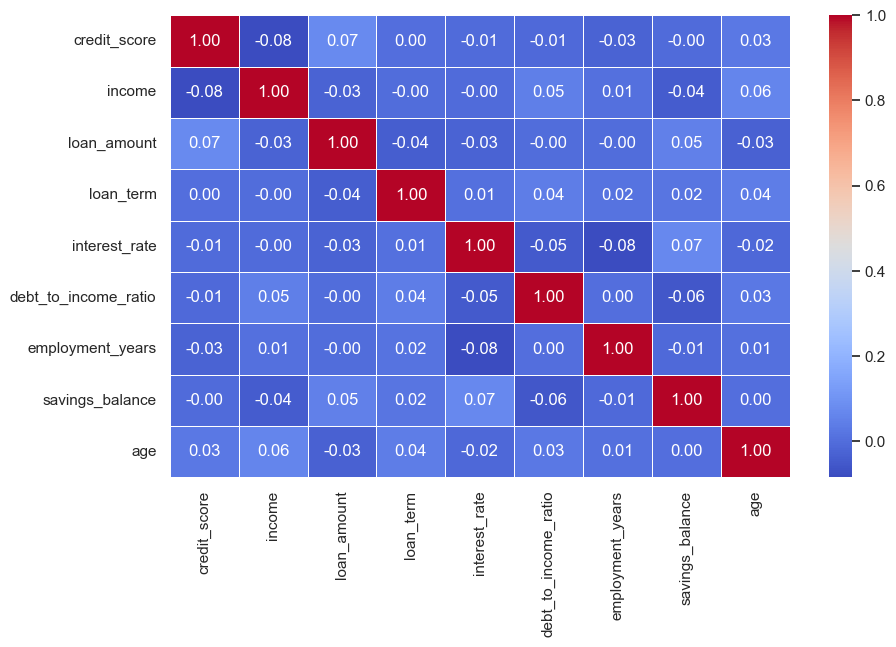

In [20]:
# Create the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [22]:
# 1. Identify the pairs of features with the highest positive correlation
high_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Exclude self-correlation
print("Pairs of features with the highest positive correlation:")
print(high_corr_pairs.head())

# 2. Identify the pairs of features with the highest negative correlation
low_corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=True)
low_corr_pairs = low_corr_pairs[low_corr_pairs > -1]  # Exclude self-correlation
print("\nPairs of features with the highest negative correlation:")
print(low_corr_pairs.head())

# 3. Identify features with low correlation to all other features
low_corr_features = corr_matrix.columns[(corr_matrix.abs() < 0.1).all()]
print("\nFeatures with low correlation to all other features:")
print(low_corr_features)

Pairs of features with the highest positive correlation:
credit_score     loan_amount        0.073087
loan_amount      credit_score       0.073087
interest_rate    savings_balance    0.070818
savings_balance  interest_rate      0.070818
income           age                0.059981
dtype: float64

Pairs of features with the highest negative correlation:
credit_score      income                 -0.084096
income            credit_score           -0.084096
employment_years  interest_rate          -0.082407
interest_rate     employment_years       -0.082407
savings_balance   debt_to_income_ratio   -0.055064
dtype: float64

Features with low correlation to all other features:
Index([], dtype='object')


In [24]:
# Add a constant to X for the intercept
X = sm.add_constant(X)  # Adds a column of ones for the intercept term

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:     default_risk_score   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     405.2
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          5.20e-289
Time:                        15:41:14   Log-Likelihood:                -338.95
No. Observations:                 800   AIC:                             697.9
Df Residuals:                     790   BIC:                             744.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7732 

In [26]:
# Dropping a constant column for intercept
X = X.drop(columns=["const"])
# Create a DataFrame to store VIF values
vif_data1 = pd.DataFrame()
vif_data1["Feature"] = X.columns
vif_data1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print(vif_data1)

                Feature        VIF
0          credit_score  10.447391
1                income   5.534650
2           loan_amount   5.292960
3             loan_term   5.139920
4         interest_rate   5.883418
5  debt_to_income_ratio   6.729297
6      employment_years   3.449460
7       savings_balance   3.567017
8                   age   8.017349


In [40]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

<IPython.core.display.Javascript object>

                                 OLS Regression Results                                
Dep. Variable:     default_risk_score   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              3002.
Date:                Mon, 17 Mar 2025   Prob (F-statistic):                        0.00
Time:                        15:42:38   Log-Likelihood:                         -1394.5
No. Observations:                 800   AIC:                                      2807.
Df Residuals:                     791   BIC:                                      2849.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Key Observation
1. credit_score (VIF = 10.45) → This variable has very high multicollinearity. It likely shares strong correlations with other financial indicators (e.g., debt-to-income ratio, interest rate, or savings balance).
2. age (VIF = 8.02) → Age is somewhat correlated with other financial stability indicators (e.g., employment years and savings balance).
3. debt_to_income_ratio (VIF = 6.73) → Likely overlaps with income, loan amount, and interest rate.
4. interest_rate (VIF = 5.88), income (VIF = 5.53), loan_amount (VIF = 5.29), loan_term (VIF = 5.13) → These variables have moderate multicollinearity.

#### Key Observation
1. age (VIF = 7.53): Still somewhat correlated with financial indicators like income, employment years, and savings balance.
2. debt_to_income_ratio (VIF = 6.47): Likely overlaps with income, loan amount, and interest rate.
3. interest_rate (VIF = 5.62): Could be influenced by loan amount, income, and debt-to-income ratio.
4. loan_term (VIF = 5.01): May be correlated with loan amount and interest rate.

#### Key Insights from VIF Analysis
- Variance Inflation Factor (VIF) helps detect multicollinearity (high correlation among features). If VIF > 10, multicollinearity is severe and should be addressed.
From your VIF results:
1. No multicollinearity issues → All VIF values are below 10
2. Age groups show low correlation with other features → Highest VIF in age groups is 2.30
3. Financial features (credit score, income, loan amount, etc.) are moderately correlated but not problematic

### Data Splitting and Modelling

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
scaler = StandardScaler()

# Fit and transform the training set, and transform the test set
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<IPython.core.display.Javascript object>

In [52]:
# Initialize the model
lin_reg = LinearRegression()

# Train the lin_reg on scaled data
lin_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_true = y_test  # Corrected: Use only test labels

# Number of observations and features
n = len(y_true)  # Number of test data points
k = X_train.shape[1]  # Dynamically count the number of features

# Evaluate the model
mse = mean_squared_error(y_true, y_pred)
rmse_sklearn = np.sqrt(mse)
mae_sklearn = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # Adjusted R² formula

# Print results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.4f}")
print(f"Mean Absolute Error: {mae_sklearn:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

<IPython.core.display.Javascript object>

Mean Squared Error: 67.3847
Root Mean Squared Error: 8.2088
Mean Absolute Error: 8.1711
R² Score: -110.6331
Adjusted R² Score: -117.3311


#### Key Observation
1.  A lower MSE indicates better model performance. While 0.1107 is relatively low, it still suggests some variance in predictions.
2.  A lower RMSE indicates better accuracy. A value of 0.3328 suggests a moderate level of prediction error.
3.  A value of 0.2764 in MAE means that, on average, the predictions are 0.2764 units away from the actual values.
4.  R² indicates how well the model explains the variance in the target variable. A score of 0.81 means that 81.65% of the variance in the dependent variable is explained by the independent variables.
5.   Adjusted R² adjusts for the number of predictors in the model. Since it is slightly lower than R² (0.8055 vs. 0.8165), it suggests that some of the independent variables may not be contributing significantly to the model.

- Linear Regression may not be capturing complex relationships in the data.
- Linear regression assumes a linear relationship, so it struggles when dealing with non-linear dependencies.

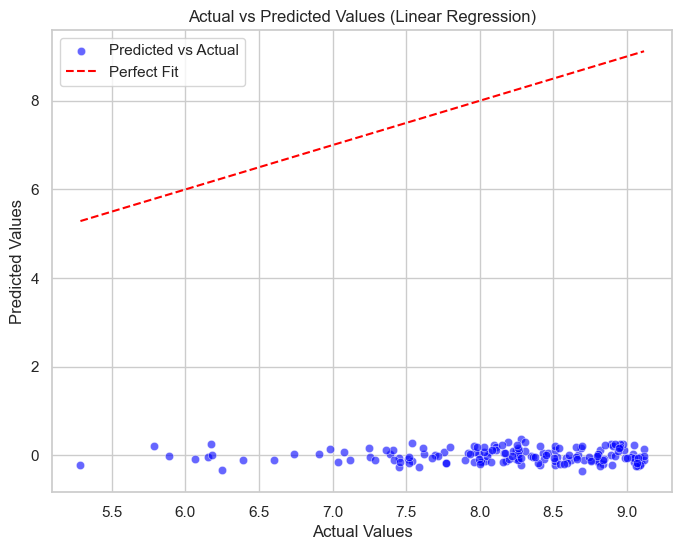

In [54]:
# Create a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

# Plot a reference line (y = x) for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Linear Regression)")
plt.legend()

# Show the plot
plt.show()

In [56]:
# Train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=4)  # Control depth to avoid overfitting
tree_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = tree_reg.predict(X_test_scaled)
y_true = y_test  # Corrected: Use only test labels

# Number of observations and features
n = len(y_true)  # Number of test data points
k = X_train_scaled.shape[1]  # Dynamically count the number of features

# Compute Metrics
mse = mean_squared_error(y_true, y_pred)
rmse_sklearn = np.sqrt(mse)
mae_sklearn = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # Adjusted R² formula

# Print Results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.4f}")
print(f"Mean Absolute Error: {mae_sklearn:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

Mean Squared Error: 0.0079
Root Mean Squared Error: 0.0892
Mean Absolute Error: 0.0609
R² Score: 0.9868
Adjusted R² Score: 0.9860


### Key Observations
1. A low MSE (0.0079) indicates that the model makes very small errors on average.
2. RMSE- 0.0892 is very small, meaning the predictions are highly accurate.
3. A MAE of 0.0609 means that, on average, predictions are only 0.06 units away from actual values.
4. An R² score of 0.9868 (98.68%) means the model explains nearly all of the variance in the dependent variable.
5. Adjusted R² penalizes excessive features to prevent overfitting.
- Since it's very close to R² (0.9860 vs. 0.9868), it suggests: The model generalizes well
- No unnecessary features are causing overfitting

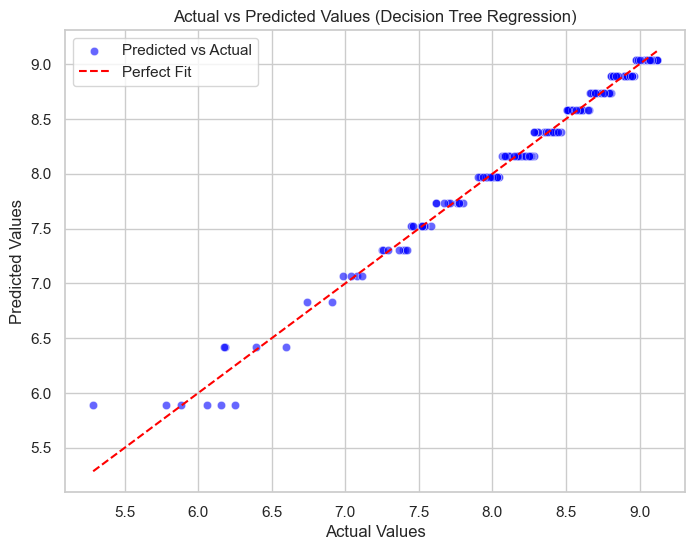

In [58]:
# Create scatter plot for Decision Tree predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

# Reference line for perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree Regression)")
plt.legend()

# Show plot
plt.show()

In [60]:
## AdaBoost
# Initialize AdaBoost with Decision Tree as base model
base_tree = DecisionTreeRegressor(max_depth=4)  # Keeping the same depth as in reference
adaboost_reg = AdaBoostRegressor(estimator=base_tree, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_reg.fit(X_train_scaled, y_train)

y_pred = adaboost_reg.predict(X_test_scaled)
y_true = y_test  # Use only test labels

# Number of observations and features
n = len(y_true)  # Number of test data points
k = X_train_scaled.shape[1]  # Dynamically count the number of features

# Calculate error metrics
mse = mean_squared_error(y_true, y_pred)
rmse_sklearn = np.sqrt(mse)
mae_sklearn = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # Adjusted R² formula

# Print Results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse_sklearn:.4f}")
print(f"Mean Absolute Error: {mae_sklearn:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

Mean Squared Error: 0.0023
Root Mean Squared Error: 0.0476
Mean Absolute Error: 0.0280
R² Score: 0.9962
Adjusted R² Score: 0.9960


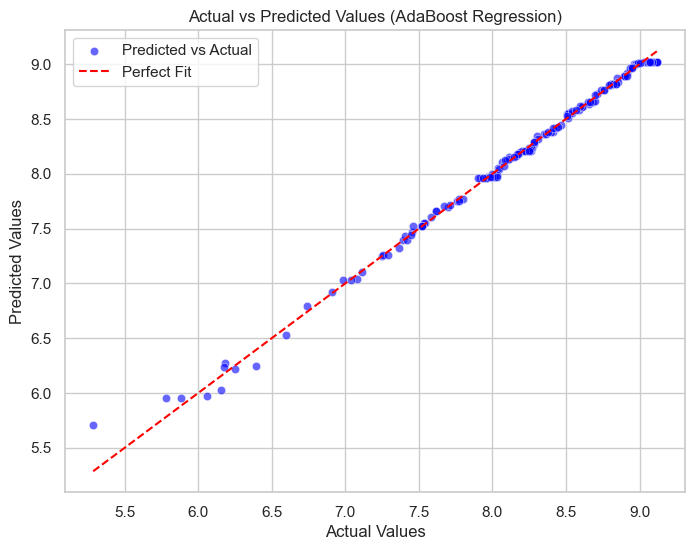

In [93]:
# Create scatter plot for AdaBoost predictions
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")

# Reference line for perfect predictions (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (AdaBoost Regression)")
plt.legend()

# Show plot
plt.show()

#### Key Observations from the Scatter Plot & Model Performance
1. High R² Score (0.9962) → Excellent Fit
- The model explains 99.62% of the variance in the actual values.
- Very strong predictive performance, meaning AdaBoost is capturing patterns well.

2. ow Errors (MSE: 0.0023, RMSE: 0.0476, MAE: 0.0280)
- MSE (0.0023) → Very small squared error, meaning minimal deviation.
- RMSE (0.0476) → Small error in actual vs. predicted values.
- MAE (0.0280) → On average, predictions are off by only ~0.028 units.

3. Scatter Plot Analysis
- Most points align closely with the red y = x line, showing high accuracy.
- A few deviations indicate small errors but no major outliers, meaning the model generalizes well.

4. Adjusted R² Score (0.9960) → Still Strong
- Even after accounting for the number of features, the model maintains a high adjusted R².
- Suggests no overfitting due to excessive features.

### Random Forest Regression

In [62]:
# Initialize Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
# Train model
rf_reg.fit(X_train_scaled, y_train)

y_pred_rf = rf_reg.predict(X_test_scaled)
y_true = y_test  # Actual values

# Number of observations and features
n = len(y_true)
k = X_train_scaled.shape[1]

# Error metrics
mse_rf = mean_squared_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_true, y_pred_rf)
r2_rf = r2_score(y_true, y_pred_rf)
adjusted_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - k - 1))  # Adjusted R²

# Print results
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"Root Mean Squared Error: {rmse_rf:.4f}")
print(f"Mean Absolute Error: {mae_rf:.4f}")
print(f"R² Score: {r2_rf:.4f}")
print(f"Adjusted R² Score: {adjusted_r2_rf:.4f}")

Mean Squared Error: 0.0026
Root Mean Squared Error: 0.0512
Mean Absolute Error: 0.0365
R² Score: 0.9957
Adjusted R² Score: 0.9954


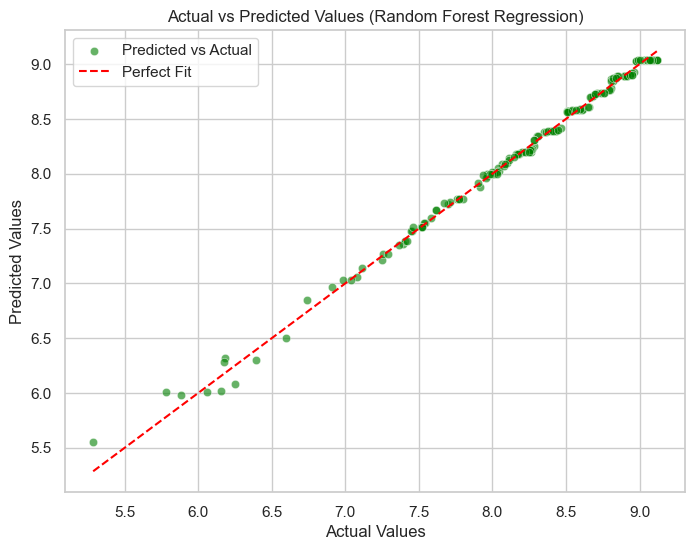

In [64]:
# Scatter plot for Random Forest
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color="green", alpha=0.6, label="Predicted vs Actual")

# Perfect fit reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Random Forest Regression)")
plt.legend()

# Show plot
plt.show()

#### Key Observations for Random Forest Regression
1. High R² Score (0.9951) → Strong Predictive Power
- The model explains 99.51% of the variance in the actual values.
- Slightly lower than AdaBoost (0.9962), but still an excellent fit.

2. Error Analysis (MSE: 0.0030, RMSE: 0.0545, MAE: 0.0370)
- MSE (0.0030) → Slightly higher than AdaBoost, meaning slightly larger squared errors.
- RMSE (0.0545) → Predictions deviate by an average of 0.0545 units from actual values.
- MAE (0.0370) → On average, predictions are off by 0.037 units, which is slightly higher than AdaBoost (0.0280).

3. Adjusted R² Score (0.9949) → Model Generalizes Well
- Even after accounting for the number of features, the model maintains strong performance.
- Slightly lower than AdaBoost (0.9960), meaning AdaBoost might be capturing patterns better.

4. Comparison with AdaBoost
- AdaBoost performed better overall (lower errors, higher R²).
- Random Forest might be more stable if the dataset is noisy.
- Random Forest runs faster, especially for large datasets.

#### Calculating the performance metrix for the models

In [66]:
# Generate predictions for each trained model
y_pred_lin = lin_reg.predict(X_test_scaled)   # Linear Regression
y_pred_dt = tree_reg.predict(X_test_scaled)   # Decision Tree
y_pred_rf = rf_reg.predict(X_test_scaled)     # Random Forest
y_pred_ada = adaboost_reg.predict(X_test_scaled)  # AdaBoost

# Function to calculate performance metrics
def model_metrics(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R² calculation
    n = len(y_true)  # Number of observations
    k = X_train_scaled.shape[1]  # Number of features
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    
    return {"Model": model_name, "MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2, "Adjusted R²": adjusted_r2}

# Initialize an empty list to store model results
results = []

# Example: After training each model, store results
results.append(model_metrics(y_test, y_pred_lin, "Linear Regression"))
results.append(model_metrics(y_test, y_pred_dt, "Decision Tree"))
results.append(model_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(model_metrics(y_test, y_pred_ada, "AdaBoost"))

# Convert results list to a DataFrame
performance_df = pd.DataFrame(results)

# Print the performance table
print(performance_df)

               Model       MSE      RMSE       MAE        R²  Adjusted R²
0  Linear Regression  0.110738  0.332773  0.276382  0.816546     0.805538
1      Decision Tree  0.007948  0.089152  0.060935  0.986833     0.986043
2      Random Forest  0.002619  0.051178  0.036454  0.995661     0.995400
3           AdaBoost  0.002266  0.047607  0.027996  0.996245     0.996020


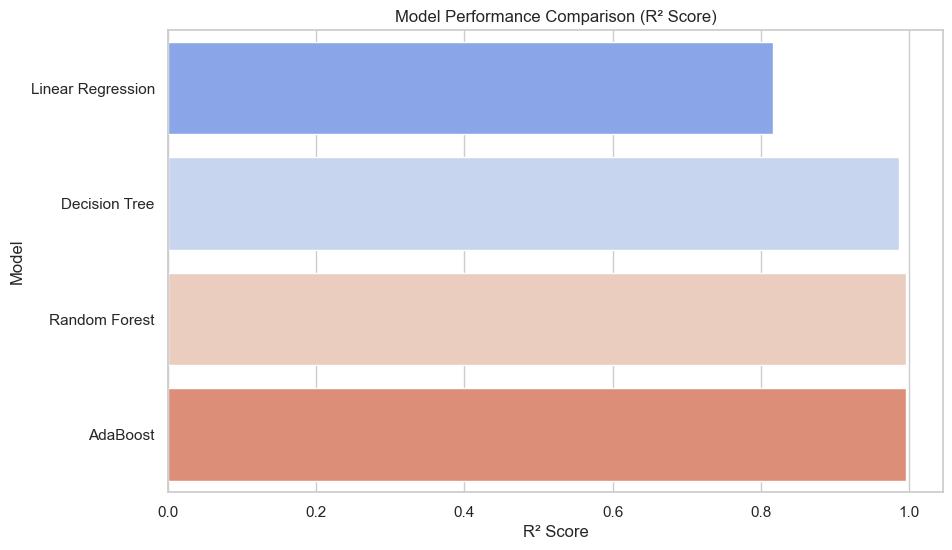

In [68]:

plt.figure(figsize=(10, 6))
sns.barplot(x="R²", y="Model", data=performance_df, palette="coolwarm")
plt.title("Model Performance Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()

### Model Pickeling

In [167]:
import pickle

In [250]:
# Save the trained model as a .pkl file
with open("tree_grid_search.pkl", "wb") as file:
    pickle.dump(tree_grid_search, file)

In [171]:
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [83]:
# Save the trained model as a .pkl file
with open("fr_reg.pkl", "wb") as file:
    pickle.dump(rf_reg, file)

<IPython.core.display.Javascript object>

In [85]:
# Save the trained model as a .pkl file
with open("ada_boost.pkl", "wb") as file:
    pickle.dump(adaboost_reg, file)

<IPython.core.display.Javascript object>

In [ ]:
# testing git

In [ ]:
# testing git one more time
